In [5]:
# %%
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

#%matplotlib inline



In [6]:
def crop_brain_contour(image, plot=False):
    
    #import imutils
    #import cv2
    #from matplotlib import pyplot as plt
    
    # image to gray
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

   
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    #extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

In [7]:
def load_data(dir_list, image_size):
    

    
    X = []
    y = []
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in listdir(directory):
            # load the image
            image = cv2.imread(directory + '\\' + filename)
            # crop the brain and ignore the unnecessary rest part of the image
            image = crop_brain_contour(image, plot=False)
            # resize image
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            # normalize values
            image = image / 255.
            # convert image to numpy array and append it to X
            X.append(image)
            # append a value of 1 to the target array if the image
            # is in the folder named 'yes', otherwise append 0.
            if directory[-3:] == 'yes':
                y.append([1])
            else:
                y.append([0])
                
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    
    return X, y

In [8]:
augmented_path = 'F:/Project/augmented data/'


augmented_yes = augmented_path + 'yes' 
augmented_no = augmented_path + 'no'

IMG_WIDTH, IMG_HEIGHT = (240, 240)

X, y = load_data([augmented_yes, augmented_no], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 2065
X shape is: (2065, 240, 240, 3)
y shape is: (2065, 1)


In [9]:
def plot_sample_images(X, y, n=50):
    """
    Plots n sample images for both values of y (labels).
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """
    
    for label in [0,1]:
        
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1 # current plot        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            # remove ticks
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                           labelbottom=False, labeltop=False, labelleft=False, labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

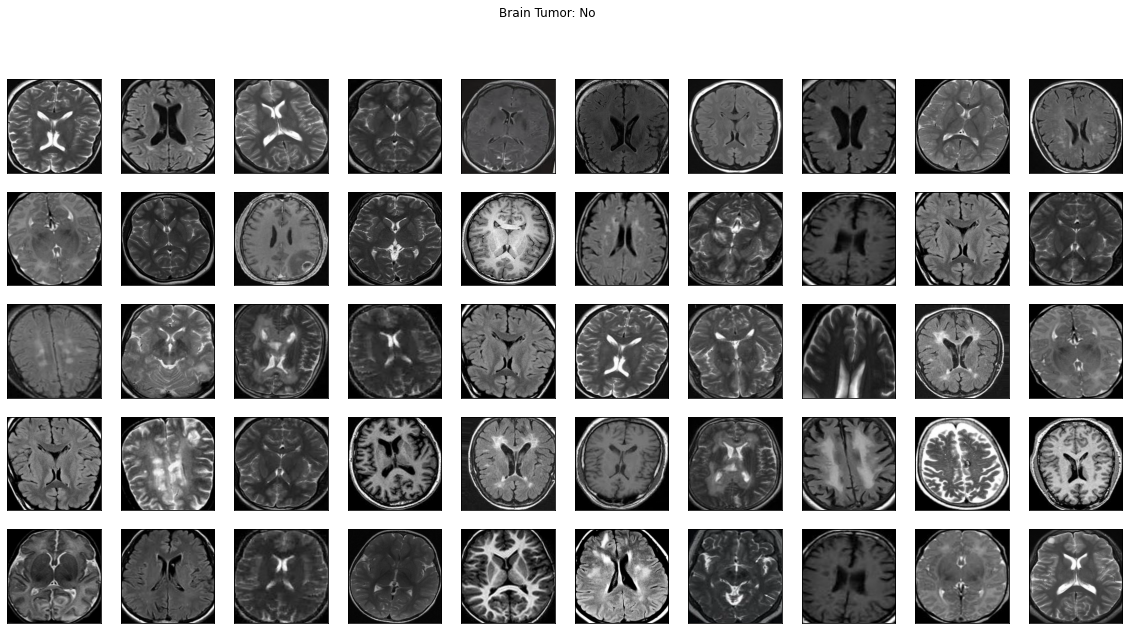

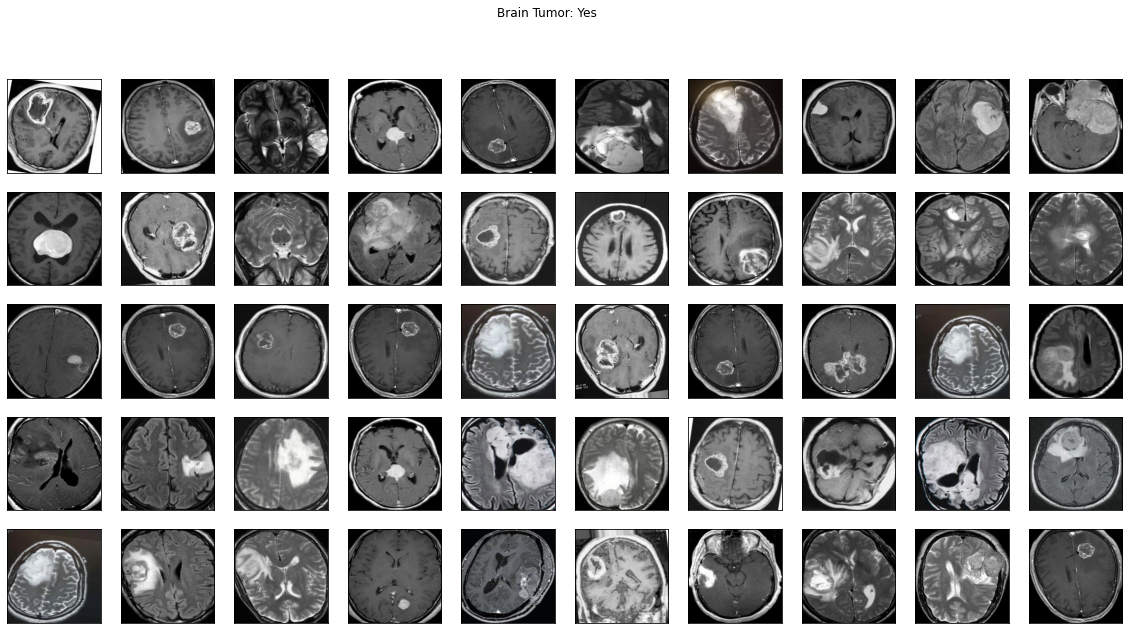

In [10]:
plot_sample_images(X, y)

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import os


# Any results you write to the current directory are saved as output.

In [14]:
train_tumor = "F:/Project/augmented data/yes"
train_nontumor= "F:/Project/augmented data/no"
test_tumor= "F:/Project/dataset/test_set/yes"
test_nontumor= "F:/Project/dataset/test_set/no"
image_size = 128

100%|██████████| 980/980 [00:04<00:00, 196.87it/s]


Text(0.5, 1.0, 'tumor and non tumor in GrayScale')

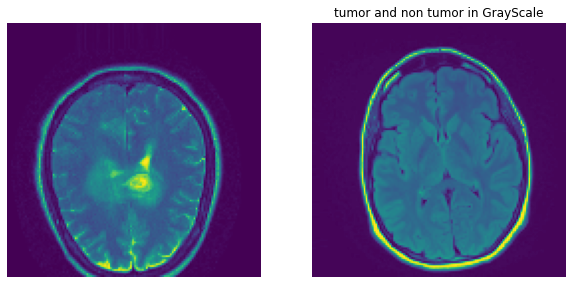

In [15]:
for image in tqdm(os.listdir(train_tumor)): 
    path = os.path.join(train_tumor, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_nontumor)): 
    path = os.path.join(train_nontumor, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("tumor and non tumor in GrayScale")

In [16]:
def train_data():
    train_data_tumor = [] 
    train_data_nontumor=[]
    for image1 in tqdm(os.listdir(train_tumor)): 
        path = os.path.join(train_tumor, image1)
        img  = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img  = cv2.resize(img, (image_size, image_size),cv2.INTER_AREA)
        train_data_tumor.append(img)
  
    for image2 in tqdm(os.listdir(train_nontumor)): 
        path = os.path.join(train_nontumor, image2)
        img3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img3 = cv2.resize(img3, (image_size, image_size),cv2.INTER_AREA)
        train_data_nontumor.append(img3) 
    
    train_data= np.concatenate((np.asarray(train_data_tumor),np.asarray(train_data_nontumor)),axis=0)
    return train_data 

In [17]:
def test_data():
    test_data_tumor = [] 
    test_data_nontumor=[]
    for image1 in tqdm(os.listdir(test_tumor)): 
        path = os.path.join(test_tumor, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_tumor.append(img1) 
    for image2 in tqdm(os.listdir(test_nontumor)): 
        path = os.path.join(test_nontumor, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size),cv2.INTER_AREA)
        test_data_nontumor.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_tumor),np.asarray(test_data_nontumor)),axis=0) 
    return test_data 

In [18]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 98/98 [00:01<00:00, 87.77it/s] 


In [19]:
print(train_data.shape)
print(test_data.shape)

(2065, 128, 128)
(253, 128, 128)


In [20]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [21]:
z1 = np.zeros(1085)
o1 = np.ones(980)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(155)
o = np.ones(98)
Y_test = np.concatenate((o, z), axis=0)

In [22]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [23]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (2318, 128, 128)
Y shape:  (2318, 1)


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [25]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (1738, 16384)
X test flatten (580, 16384)


In [26]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 1738)
x test:  (16384, 580)
y train:  (1, 1738)
y test:  (1, 580)


In [27]:
parameters = {}

In [28]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    global parameters
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    
    
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

In [29]:
parameters

{}

Cost after iteration 0: nan
Cost after iteration 100: 0.976855
Cost after iteration 200: 0.818985
Cost after iteration 300: 0.755430
Cost after iteration 400: 0.705861
Cost after iteration 500: 0.663707
Cost after iteration 600: 0.626576
Cost after iteration 700: 0.593589
Cost after iteration 800: 0.564058
Cost after iteration 900: 0.537255
Cost after iteration 1000: 0.512592
Cost after iteration 1100: 0.489650
Cost after iteration 1200: 0.468141
Cost after iteration 1300: 0.447868
Cost after iteration 1400: 0.428691
Cost after iteration 1500: 0.410512
Cost after iteration 1600: 0.393265
Cost after iteration 1700: 0.376907
Cost after iteration 1800: 0.361430
Cost after iteration 1900: 0.346888
Cost after iteration 2000: 0.333500
Cost after iteration 2100: 0.321933
Cost after iteration 2200: 0.313448
Cost after iteration 2300: 0.307791
Cost after iteration 2400: 0.302911
Cost after iteration 2500: 0.298221
Cost after iteration 2600: 0.293691
Cost after iteration 2700: 0.289309
Cost afte

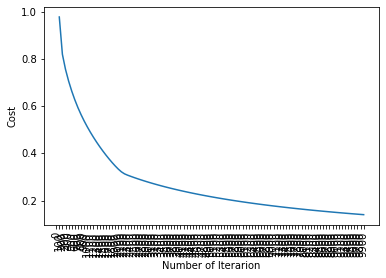

Test Accuracy: 63.97 %
Train Accuracy: 98.85 %


In [30]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 10000)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression = LogisticRegression(random_state=42)
log_reg_cv = GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(x_train.T,y_train.T)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid=({'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2']},))

In [ ]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)

best hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
accuracy:  0.6875257457976213


In [ ]:
log_reg = LogisticRegression(C=1,penalty="l1", solver='liblinear')
log_reg.fit(x_train.T,y_train.T)
print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.9913793103448276 
train accuracy: 0.9930955120828538 
